Original Dataset:
    Age   Salary  Gender Department  Purchase
0  25.0  50000.0    Male      Sales         1
1  30.0  54000.0  Female         IT         0
2   NaN  58000.0  Female         HR         1
3  35.0      NaN    Male         IT         1
4  28.0  52000.0    Male      Sales         0
5  40.0  62000.0     NaN         HR         0
6  29.0  61000.0  Female         HR         1
7  31.0  59000.0    Male         IT         1

Missing Values:
Age           1
Salary        1
Gender        1
Department    0
Purchase      0
dtype: int64


C:\Users\pvsun\AppData\Local\Temp\ipykernel_15920\84922533.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\pvsun\AppData\Local\Temp\ipykernel_15920\84922533.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

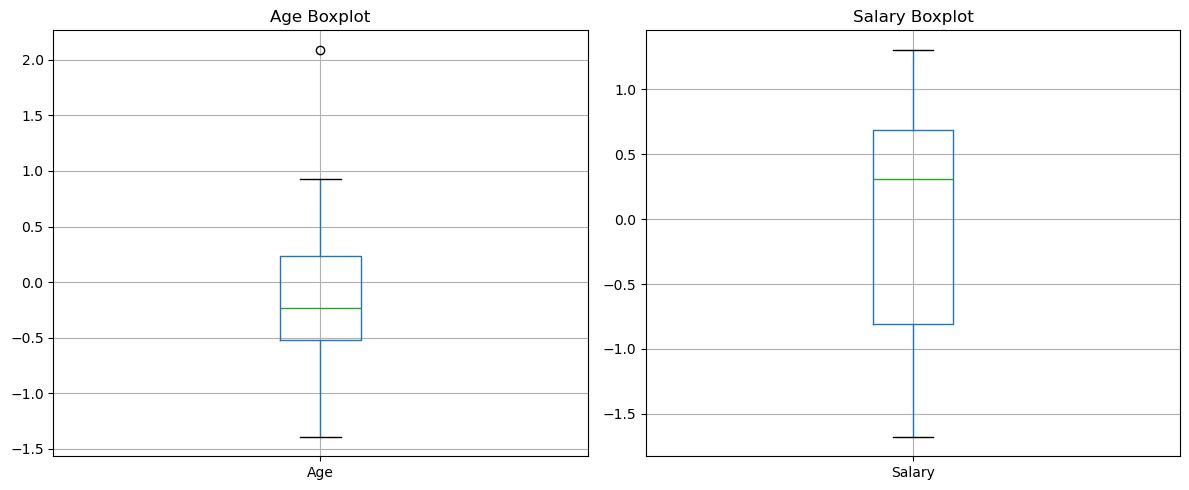


Cleaned Dataset:
        Age    Salary  Gender  Purchase  Dept_HR  Dept_IT  Dept_Sales
0 -1.394972 -1.677698       0         1    False    False        True
1 -0.232495 -0.683507       1         0    False     True       False
2 -0.232495  0.310685       1         1     True    False       False
3  0.929981  0.310685       0         1    False     True       False
4 -0.697486 -1.180603       0         0    False    False        True
6 -0.464991  1.056329       1         1     True    False       False
7  0.000000  0.559233       0         1    False     True       False

Data Types After Cleaning:
Age           float64
Salary        float64
Gender          int64
Purchase        int64
Dept_HR          bool
Dept_IT          bool
Dept_Sales       bool
dtype: object

Feature Matrix Shape: (7, 6)
Target Vector Shape: (7,)


In [3]:
# Data Cleaning and Preprocessing for Machine Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Load the dataset (using sample data here)
data = {
    'Age': [25, 30, np.nan, 35, 28, 40, 29, 31],
    'Salary': [50000, 54000, 58000, np.nan, 52000, 62000, 61000, 59000],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', np.nan, 'Female', 'Male'],
    'Department': ['Sales', 'IT', 'HR', 'IT', 'Sales', 'HR', 'HR', 'IT'],
    'Purchase': [1, 0, 1, 1, 0, 0, 1, 1]  # Target variable
}

df = pd.DataFrame(data)

print("Original Dataset:")
print(df)
print("\nMissing Values:")
print(df.isnull().sum())

# 2. Handle Missing Values
# Fill numerical columns with median
for col in ['Age', 'Salary']:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
for col in ['Gender']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 3. Convert categorical features to numerical
# One-hot encode Department
df = pd.get_dummies(df, columns=['Department'], prefix='Dept')

# Label encode Gender
gender_map = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_map)

# 4. Normalize/Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['Age', 'Salary']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 5. Detect and handle outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df.boxplot(column=['Age'])
plt.title('Age Boxplot')

plt.subplot(1, 2, 2)
df.boxplot(column=['Salary'])
plt.title('Salary Boxplot')
plt.tight_layout()
plt.show()

# Remove outliers using IQR method
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)].copy()

for col in numerical_cols:
    df = remove_outliers(df, col)

print("\nCleaned Dataset:")
print(df)
print("\nData Types After Cleaning:")
print(df.dtypes)

# Final preprocessed data is now ready for ML
X = df.drop('Purchase', axis=1)
y = df['Purchase']

print("\nFeature Matrix Shape:", X.shape)
print("Target Vector Shape:", y.shape)
